In [5]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<h3 style="color:#70C1B3; font-weight:bold">Data Exploration</h3>


<h5 style="color:#FFE066; font-weight:bold">Understanding Data</h5>


<h5>
Sales → Total revenue from a sale.<br>
Quantity → Number of units sold.<br>
Profit → Revenue after costs (useful for profit margin analysis).<br>
SalesGrowth → Growth rate of sales over time (useful for trend analysis).<br>
SalesCategory → Categorized sales values (e.g., High, Medium, Low).<br>
Discount → The percentage or amount of discount applied.<br>
DiscountEffect → Impact of discount on sales (e.g., increased volume, reduced profit).<br>
DiscountCategory → Categorization of discount levels (e.g., Low, Medium, High).<br>
PromotionFlag → Whether a promotion was applied (1 = Yes, 0 = No).<br>
Weekday, IsWeekend → Check if sales peak on weekends or weekdays.<br>
Segment → (e.g., Consumer, Corporate, Home Office) → Check which segment spends the most.
</h5>

In [2]:
data = pd.read_csv('CleanData.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Year,Month,Weekday,IsWeekend,Season,PromotionFlag,DiscountCategory
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,62.1544,40.77,High,2014,11,Tuesday,False,Fall,0,No Discount
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,-55.2150,57.21,Critical,2014,2,Wednesday,False,Winter,1,Low
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,92.0250,57.21,Medium,2014,10,Friday,False,Fall,1,Low
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,-55.2150,57.21,Medium,2014,1,Tuesday,False,Winter,1,Low
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,92.0250,57.21,Critical,2014,11,Wednesday,False,Fall,0,No Discount


<h5 style="font-weight:bold">The number of orders from each segment</h5>


In [3]:
data["Segment"].value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

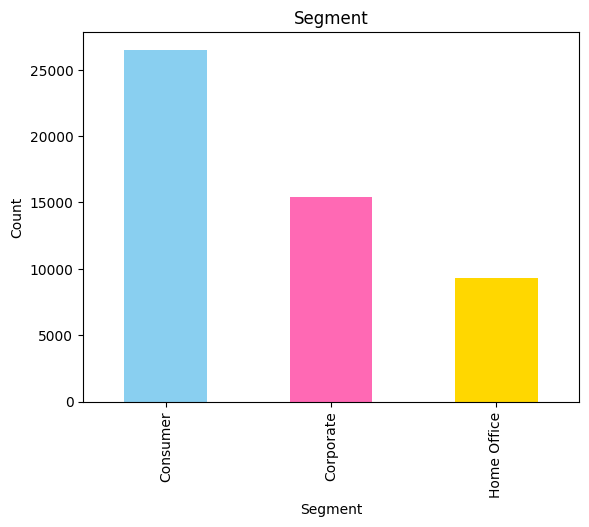

In [6]:
data["Segment"].value_counts().plot(kind="bar", color=colors)
plt.title("Segment")
plt.ylabel("Count")
plt.show()

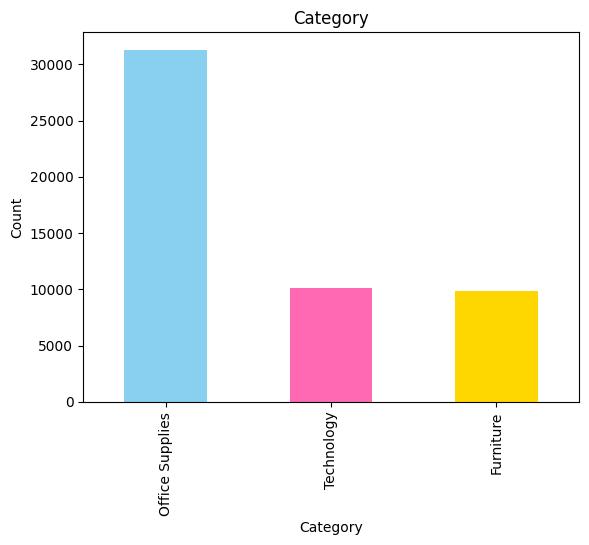

In [7]:
data["Category"].value_counts().plot(kind="bar", color=colors)
plt.title("Category")
plt.ylabel("Count")
plt.show()

<h5>The number of orders for sub_category</h5>

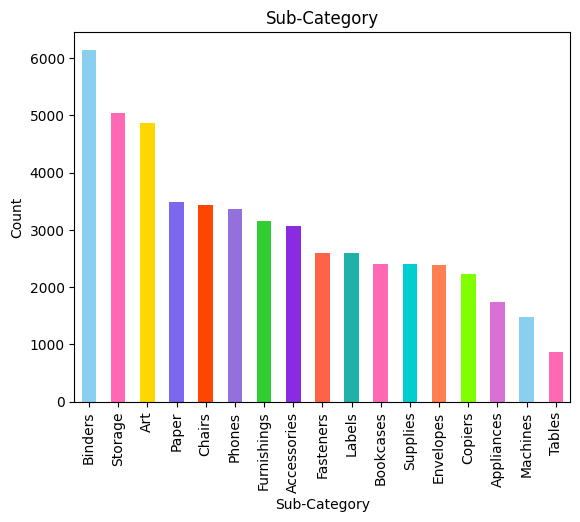

In [8]:
data["Sub-Category"].value_counts().plot(kind="bar", color=colors)
plt.title("Sub-Category")
plt.ylabel("Count")
plt.show()

<h5>Sales Trends</h5>

<Axes: xlabel='Month'>

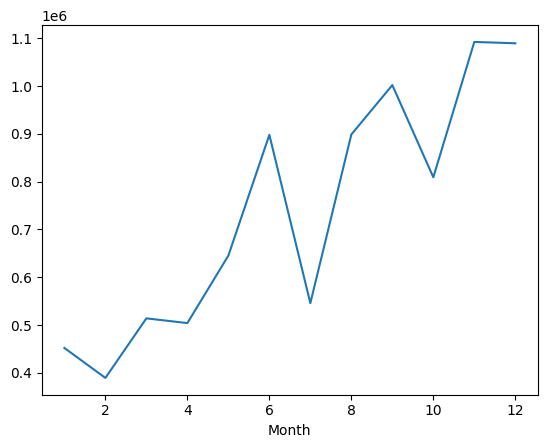

In [9]:
data.groupby("Month")["Sales"].sum().plot(kind="line")

<Axes: xlabel='Season'>

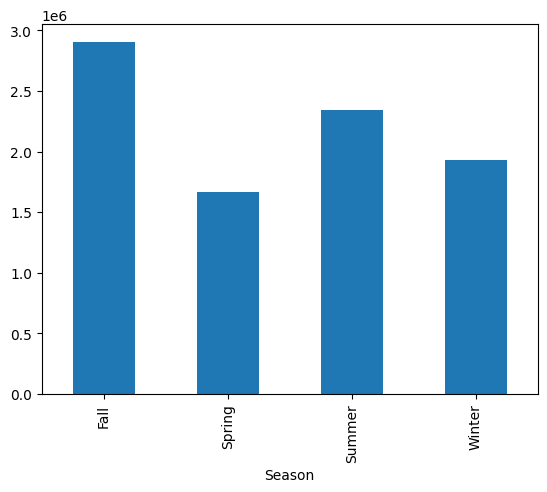

In [10]:
data.groupby("Season")["Sales"].sum().plot(kind="bar")

In [11]:
data.groupby("Season")["Sales"].sum().sort_values(ascending=False)

Season
Fall     2,903,499.48
Summer   2,342,389.46
Winter   1,930,986.98
Spring   1,663,426.31
Name: Sales, dtype: float64

**Top Products and Categories**

In [12]:
data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

Sub-Category
Phones        1,043,544.98
Chairs        1,041,158.40
Storage         950,758.37
Bookcases       947,661.40
Copiers         935,523.06
Accessories     612,142.05
Appliances      534,575.90
Machines        486,811.98
Tables          394,372.07
Furnishings     371,275.98
Art             370,597.76
Binders         365,389.46
Paper           241,385.35
Supplies        213,318.49
Envelopes       169,194.33
Fasteners        89,495.05
Labels           73,097.60
Name: Sales, dtype: float64

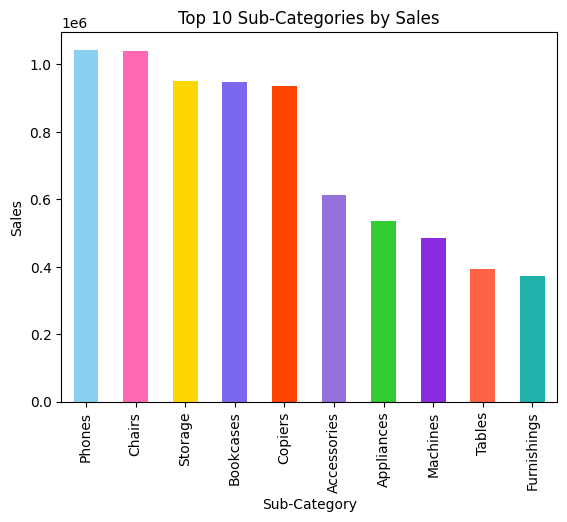

In [13]:
data.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10).plot(kind="bar",color=colors)
plt.ylabel("Sales")
plt.title("Top 10 Sub-Categories by Sales")
plt.show()

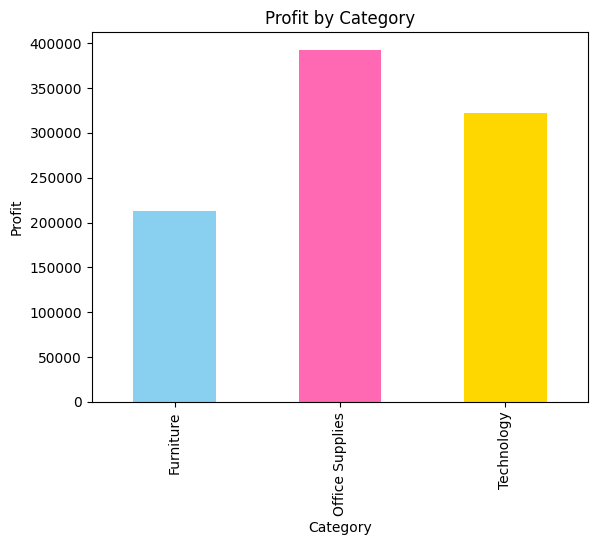

In [14]:
data.groupby('Category')['Profit'].sum().plot(kind='bar',color=colors)
plt.ylabel('Profit')
plt.title('Profit by Category')
plt.show()

**The 10 customers with the highest number of orders.**


In [15]:
data['Customer ID'].value_counts().head(10)

Customer ID
SV-203651406    26
WB-218501404    24
AP-109151404    23
EM-1396082      21
CS-121757       20
JK-1609027      19
RW-195401404    19
TB-210551406    18
RB-1933082      18
YC-2189545      18
Name: count, dtype: int64

**The sales in weekend**

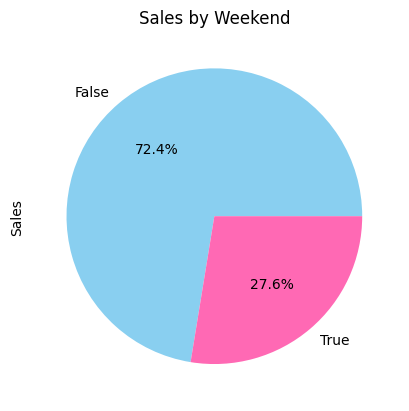

In [16]:
data.groupby('IsWeekend')['Sales'].sum().plot(kind="pie",colors=colors,autopct='%1.1f%%')
plt.title('Sales by Weekend')
plt.show()